# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.buscalibre.com.co/libro-mecanica-celeste-teoria-algoritmos-y-problemas/9789585011953/p/62242977?afiliado=74c874bfb5a8145d7c1b). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-13-doscuerpos_sintesis_y_especiales.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del Problema de los dos Cuerpos: síntesis y tópicos especiales

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Una síntesis del problema de los dos cuerpos: ejemplo numérico

Condiciones iniciales:

In [63]:
from numpy import array
t0=0
sistema=[
    dict(m=1.0,
         r=array([0.0,0.0,+0.3]),
         v=array([+1.0,0.0,0.5])),
    dict(m=0.5,
         r=array([+1.0,0.0,0.0]),
         v=array([0.0,+1.0,0.0])),
]

#Condiciones iniciales
m1=sistema[0]["m"]
r1_0=sistema[0]["r"]
v1_0=sistema[0]["v"]

m2=sistema[1]["m"]
r2_0=sistema[1]["r"]
v2_0=sistema[1]["v"]

#Posición y velocidad relativa inicial
rvec0=r1_0-r2_0
vvec0=v1_0-v2_0

Propaga las posiciones:

In [66]:
from pymcel import propaga_estado
t=10.0
r1,v1,r2,v2,rvec,vvec=propaga_estado(sistema,t0,t,verbose=0)

print(f"Estado en t = {t:g}:")
print(f"Vector relativo = {rvec}")
print(f"Velocidad relativa = {vvec}")
print(f"Posición partícula 1 = {r1}")
print(f"Velocidad partícula 1 = {v1}")
print(f"Posición partícula 2 = {r2}")
print(f"Velocidad partícula 2 = {v2}")

Estado en t = 10:
Vector relativo = [-0.06422662  3.24166306 -2.57406246]
Velocidad relativa = [-0.30954385  0.05351131  0.0500541 ]
Posición partícula 1 = [6.97859113 4.41388769 2.67531251]
Velocidad partícula 1 = [0.56348538 0.35117044 0.35001803]
Posición partícula 2 = [7.04281775 1.17222463 5.24937497]
Velocidad partícula 2 = [0.87302923 0.29765912 0.29996393]


Comparamos los resultados de la propagación usando la solución numérica:

In [67]:
from numpy import linspace
ts=linspace(0,30.0,20)

from pymcel.export import ncuerpos_solucion
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

from numpy import zeros_like
rs_teo=zeros_like(rs)
vs_teo=zeros_like(vs)
for i,t in enumerate(ts):
    r1,v1,r2,v2,rvec,vvec=propaga_estado(sistema,t0,t)
    rs_teo[0,i]=r1
    rs_teo[1,i]=r2
    vs_teo[0,i]=v1
    vs_teo[1,i]=v2

Comparamos las dos soluciones:

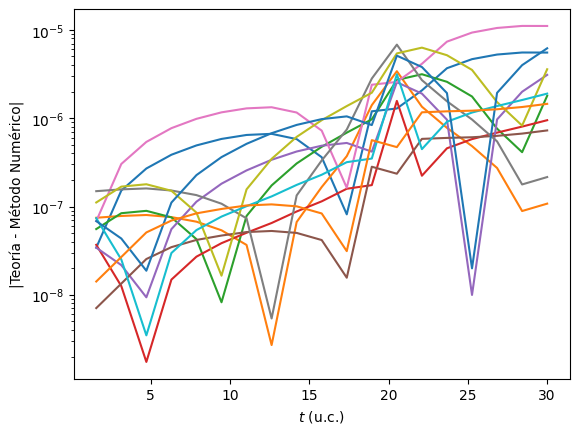

In [68]:
error_rs=abs(rs-rs_teo)
error_vs=abs(vs-vs_teo)

import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

for i in range(2):
    for j in range(3):
        ax.plot(ts[1:],error_rs[i,1:,j],label="")
        ax.plot(ts[1:],error_vs[i,1:,j],label="")

#Decoración
ax.set_xlabel("$t$ (u.c.)")
ax.set_ylabel("|Teoría - Método Numérico|")
ax.set_yscale("log")

### Variables Universales

Cálculo de la anomalía excéntrica usando la ecuación de Kepler y el método de variables universales:

In [70]:
#Propiedades del sistema
mu=1.0
p=2.0
tp=0.0
t=10.0
e=1.5
a=p/(1-e**2)
q=p/(1+e)

#Anomalía media generalizada
from numpy import sqrt
M=sqrt(mu)*(t-tp)

#Solución usando variables universales
from pymcel.export import metodo_laguerre, funcion_universal_kepler
x,errorx,ni=metodo_laguerre(funcion_universal_kepler,
                            x0=M,args=(M,e,q),delta=1e-14)
Euni=x/sqrt(abs(a))
errorEuni=errorx/sqrt(abs(a))

#Solución usando la ecuación de Kepler
from pymcel.export import kepler_newton
n=sqrt(mu/abs(a)**3)
M=n*(t-tp)
E,errorE,niE=kepler_newton(M,e,delta=1e-14)

from numpy import pi
print(f"E (con variables universales): {Euni*180/pi} grados (error {errorEuni*Euni*180/pi})")
print(f"E (con ecuación de Kepler): {E*180/pi} grados (error {errorE*E*180/pi})")

E (con variables universales): 130.32287447321414 grados (error 0.0)
E (con ecuación de Kepler): 130.32287447321414 grados (error 2.5444437451708134e-14)


### Las funciones f y g

In [72]:
#Sistema
from numpy import array
t0=0
sistema=[
    dict(m=1.0,
         r=array([0.0,0.0,+0.3]),
         v=array([+1.0,0.0,0.5])),
    dict(m=0.5,
         r=array([+1.0,0.0,0.0]),
         v=array([0.0,+1.0,0.0])),
]

#Condiciones iniciales
m1=sistema[0]["m"]
r1_0=sistema[0]["r"]
v1_0=sistema[0]["v"]

m2=sistema[1]["m"]
r2_0=sistema[1]["r"]
v2_0=sistema[1]["v"]

#Posición y velocidad relativa inicial
rvec0=r1_0-r2_0
vvec0=v1_0-v2_0

from pymcel import propaga_f_g
s,f,g,dotf,dotg,rvec,vvec=propaga_f_g(mu,rvec0,vvec0,t0,t,verbose=True)

print(f"Estado para t = {t:g}")
print(f"Variable universal, s = {s:g}")
print(f"f = {f:g}, g = {g:g}")
print(f"f' = {dotf:g}, g' = {dotg:g}")
print(f"r = {rvec}")
print(f"v = {vvec}")

Estado para t = 10
Variable universal, s = 3.72932
f = -8.67675, g = -0.891859
f' = -0.839682, g' = -0.201559
r = [ 7.78488648  0.89185893 -3.04895309]
v = [ 0.63812318  0.20155925 -0.35268435]


### Aproximación de dos cuerpos para sistemas jerárquicos


Consideremos un sistema jerárquico de 2 cuerpos:

In [73]:
sistema=[
    dict(
        m=10.0,
        r=[1,0,0],
        v=[0,1,0.5]),
    dict(
        m=1.0,
        r=[1.5,0,0],
        v=[0,-3,1],
    ),
    dict(
        m=0.01,
        r=[-1,0,0],
        v=[0,3,1],
    )
]

Se puede dividir en dos sistemas:

In [75]:
from numpy import array
sistemaA=[
    dict(
        m=10.0,
        r=array([1,0,0]),
        v=array([0,1,0.5])
    ),
    dict(
        m=1.0,
        r=array([1.5,0,0]),
        v=array([0,-3,1]),
    )
]

masaA=sistemaA[0]["m"]+sistemaA[1]["m"]
r_CM_A=(sistemaA[0]["m"]*sistemaA[0]["r"]+\
        sistemaA[1]["m"]*sistemaA[1]["r"])/masaA
v_CM_A=(sistemaA[0]["m"]*sistemaA[0]["v"]+\
        sistemaA[1]["m"]*sistemaA[1]["v"])/masaA

print("Sistema A:")
print(f"Masa : = {masaA}")
print(f"Posición del centro de masa : = {r_CM_A}")
print(f"Velocidad del centro de masa : = {v_CM_A}")

from numpy import array
sistemaB=[
    dict(
        m=masaA,
        r=r_CM_A,
        v=v_CM_A,
    ),
    dict(
        m=0.01,
        r=array([-1,0,0]),
        v=array([0,3,1]),
    )
]
masaB=sistemaB[0]["m"]+sistemaB[1]["m"]

Sistema A:
Masa : = 11.0
Posición del centro de masa : = [1.04545455 0.         0.        ]
Velocidad del centro de masa : = [0.         0.63636364 0.54545455]


Ahora podemos propagar los dos sistemas independientemente:

In [76]:
from pymcel.export import propaga_estado
t0=0
t=1.0

#Sistema A
r1,v1,r2,v2,rvecA,vvecA=propaga_estado(sistemaA,t0,t)

#Sistema B
rA,vA,r3,v3,rvecB,vvecB=propaga_estado(sistemaB,t0,t)

También podemos integrar el sistema completo:

In [77]:
from pymcel.export import ncuerpos_solucion
ts=[t0,t]
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

Comparemos las soluciones

In [78]:
print("Partícula 1:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[0,1,:]}")
print(f"\t\tDos cuerpos: {r1}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[0,1,:]}")
print(f"\t\tDos cuerpos: {v1}")
print("Partícula 2:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[1,1,:]}")
print(f"\t\tDos cuerpos: {r2}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[1,1,:]}")
print(f"\t\tDos cuerpos: {v2}")
print("Partícula 3:")
print("\tPosición:")
print(f"\t\tN cuerpos: {rs[2,1,:]}")
print(f"\t\tDos cuerpos: {r3}")
print("\tVelocidad:")
print(f"\t\tN cuerpos: {vs[2,1,:]}")
print(f"\t\tDos cuerpos: {v3}")

Partícula 1:
	Posición:
		N cuerpos: [1.0048383  0.65569534 0.54317083]
		Dos cuerpos: [1.00588816 0.65527116 0.5430911 ]
	Velocidad:
		N cuerpos: [0.21350298 0.9523843  0.50633134]
		Dos cuerpos: [0.2152712  0.95124402 0.5060945 ]
Partícula 2:
	Posición:
		N cuerpos: [1.4400009  0.44762822 0.56917975]
		Dos cuerpos: [1.44111843 0.44728838 0.56908895]
	Velocidad:
		N cuerpos: [-2.15539786 -2.51097523  0.93917367]
		Dos cuerpos: [-2.15271202 -2.51244021  0.93905503]
Partícula 3:
	Posición:
		N cuerpos: [0.16161001 2.54183689 0.91119156]
		Dos cuerpos: [0.15798609 2.54292744 0.91210143]
	Velocidad:
		N cuerpos: [2.03681019 1.71322222 0.75129016]
		Dos cuerpos: [2.03238481 1.71734141 0.75333489]


Podemos también hacer una comparación gráfica:

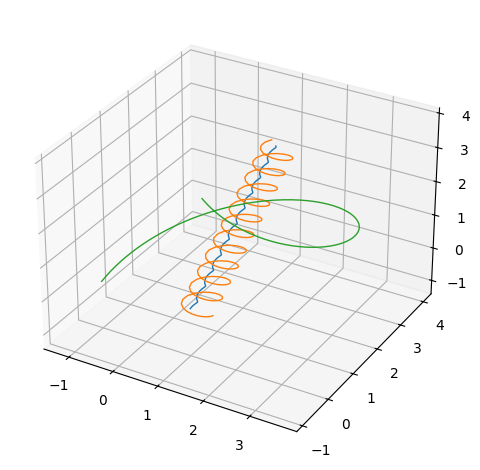

In [80]:
from pymcel.export import propaga_estado
from numpy import linspace

#Ventana de integración
t0=0.0
T=5.0

#Solución al problema de los N cuerpos
from pymcel.export import ncuerpos_solucion
ts=linspace(t0,T,200)
rs_num,vs_num,rps_num,vps_num,constantes=ncuerpos_solucion(sistema,ts)

from numpy import zeros_like
rs_aprox=zeros_like(rs_num)
Nt=20
ts=linspace(t0,T,Nt)
for i,t in enumerate(ts):
    #Sistema A
    ra1,va1,ra2,va2,ravecA,vavecA=propaga_estado(sistemaA,t0,t)

    #Sistema B
    raA,vaA,ra3,va3,ravecB,vavecB=propaga_estado(sistemaB,t0,t)
    
    rs_aprox[0,i]=ra1
    rs_aprox[1,i]=ra2
    rs_aprox[2,i]=ra3
    
#Grafíco
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rs_num,vs_num)
ax=fig.gca()

ax.plot(rs_aprox[0,:Nt,0],rs_aprox[0,:Nt,1],rs_aprox[0,:Nt,2],'b+')
ax.plot(rs_aprox[1,:Nt,0],rs_aprox[1,:Nt,1],rs_aprox[1,:Nt,2],'r+')
ax.plot(rs_aprox[2,:Nt,0],rs_aprox[2,:Nt,1],rs_aprox[2,:Nt,2],'g+')

plt.show()

### Predicciones en el sistema solar

Vamos a obtener la posición y velocidad exacta de la Tierra y Marte para una fecha específica:

In [82]:
from spiceypy import furnsh
furnsh("pymcel/data/de430.tpc")
furnsh("pymcel/data/de430.bsp")

#Fecha de referencia J2000.0
t0=0

#Parametro gravitacional del sistema
from spiceypy import bodvrd
mu=bodvrd("SUN","GM",1)[1][0]

#Vectores de estado de la Tierra y Marte
from spiceypy import spkezr
tierra,tluz=spkezr("EARTH_BARYCENTER",t0,"ECLIPJ2000","None","SUN")
rtierra0=tierra[:3]
vtierra0=tierra[3:]
marte,tluz=spkezr("MARS_BARYCENTER",t0,"ECLIPJ2000","None","SUN")
rmarte0=marte[:3]
vmarte0=marte[3:]

print("Estado inicial de la Tierra (SPICE):")
print(f"\tPosición: {rtierra0}")
print(f"\tVelocidad: {vtierra0}")
print("Estado inicial de Marte (SPICE):")
print(f"\tPosición: {rmarte0}")
print(f"\tVelocidad: {vmarte0}")

Estado inicial de la Tierra (SPICE):
	Posición: [-2.65025770e+07  1.44693956e+08 -1.70505187e+02]
	Velocidad: [-2.97864408e+01 -5.47817684e+00  4.19797701e-05]
Estado inicial de Marte (SPICE):
	Posición: [ 2.08048141e+08 -2.00705251e+06 -5.15628899e+06]
	Velocidad: [ 1.16267242 26.29606454  0.52229699]


Ahora usaremos la rutina `propaga_f_g` para calcular la posiciòn de la Tierra y Marte en el futuro:

In [84]:
#30 días más tarde
t=180*86400

#Propaga la posición de la Tierra
from pymcel.export import propaga_f_g
prediccion_tierra=propaga_f_g(mu,rtierra0,vtierra0,t0,t,verbose=True)
rtierra=prediccion_tierra[5]
vtierra=prediccion_tierra[6]

#Propaga la posición de Marte
prediccion_marte=propaga_f_g(mu,rmarte0,vmarte0,t0,t,verbose=True)
rmarte=prediccion_marte[5]
vmarte=prediccion_marte[6]

print("Estado propagado de la Tierra (aproximación):")
print(f"\tPosición: {rtierra}")
print(f"\tVelocidad: {vtierra}")
print("Estado inicial de Marte (aproximación):")
print(f"\tPosición: {rmarte}")
print(f"\tVelocidad: {vmarte}")

Estado propagado de la Tierra (aproximación):
	Posición: [ 2.12651481e+07 -1.50593536e+08  1.84746693e+02]
	Velocidad: [ 2.90111873e+01  4.05388504e+00 -3.91059499e-05]
Estado inicial de Marte (aproximación):
	Posición: [-3.75596491e+07  2.34997200e+08  5.84626235e+06]
	Velocidad: [-23.00765883  -1.7690655    0.52851442]


Podemos compara este resultado con el mismo pero obtenido con SPICE:

In [85]:
#Vectores de estado de la Tierra y Marte
tierra,tluz=spkezr("EARTH_BARYCENTER",t,"ECLIPJ2000","None","SUN")
marte,tluz=spkezr("MARS_BARYCENTER",t,"ECLIPJ2000","None","SUN")

print("Estado propagado de la Tierra (SPICE):")
print(f"\tPosición: {tierra[:3]}")
print(f"\tVelocidad: {tierra[3:]}")
print("Estado inicial de Marte (SPICE):")
print(f"\tPosición: {marte[:3]}")
print(f"\tVelocidad: {marte[3:]}")

Estado propagado de la Tierra (SPICE):
	Posición: [ 2.12704637e+07 -1.50594283e+08  2.98450430e+02]
	Velocidad: [ 2.90108118e+01  4.05407503e+00 -2.81172149e-05]
Estado inicial de Marte (SPICE):
	Posición: [-3.75381027e+07  2.35025828e+08  5.84580453e+06]
	Velocidad: [-23.00526594  -1.7643746    0.52849927]


Ahora comparemos las posiciones que debería tener Marte en el cielo:

In [86]:
from spiceypy import reclat
#Distancia a Marte, longitud y latitud eclíptica del planeta
dist,long,lat=reclat(marte[:3]-tierra[:3])
#Valores usando la teoría aproximada
dist_aprox,long_aprox,lat_aprox=reclat(rmarte-rtierra)

from numpy import pi
print("Distancia:")
print(f"\tReal: {dist} km")
print(f"\tAprox.: {dist_aprox} km")
print("Longitud eclíptica:")
print(f"\tReal: {long*180/pi:.7f} grados")
print(f"\tAprox.: {long_aprox*180/pi:.7f} grados")
print(f"\tDiferencia: {abs(long_aprox-long)*180/pi*60:.7f} arcmin")
print("Latitud eclíptica:")
print(f"\tReal: {lat*180/pi:.7f} grados")
print(f"\tAprox.: {lat_aprox*180/pi:.7f} grados")
print(f"\tDiferencia: {abs(lat_aprox-lat)*180/pi*60:.7f} arcmin")

Distancia:
	Real: 390122400.20565176 km
	Aprox.: 390095819.98641676 km
Longitud eclíptica:
	Real: 98.6710192 grados
	Aprox.: 98.6740266 grados
	Diferencia: 0.1804482 arcmin
Latitud eclíptica:
	Real: 0.8585392 grados
	Aprox.: 0.8586816 grados
	Diferencia: 0.0085473 arcmin


Hagamos un gráfico de la diferencia entre la posición en el cielo calculada y la real:

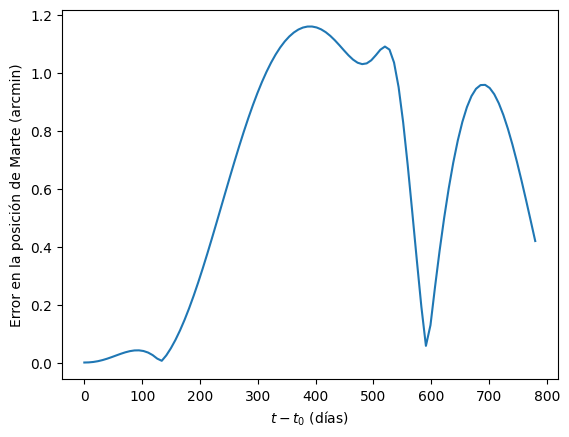

In [87]:
from numpy import linspace

#Tiempos por un período sinódico completo de Marte
ts=linspace(0,780*86400,100)
errores=[]

for t in ts:
    #Propaga la posición de la Tierra
    from spiceypy import prop2b
    prediccion_tierra=prop2b(mu,list(rtierra0)+list(vtierra0),t-t0)
    rtierra=prediccion_tierra[:3]
    vtierra=prediccion_tierra[3:]

    #Propaga la posición de Marte
    from spiceypy import prop2b
    prediccion_marte=prop2b(mu,list(rmarte0)+list(vmarte0),t-t0)
    rmarte=prediccion_marte[:3]
    vmarte=prediccion_marte[3:]
    
    #Calcula las coordenadas predichas
    dist_aprox,long_aprox,lat_aprox=reclat(rmarte-rtierra)
    
    #Obtiene las coordenadas reales de Marte y la Tierra
    tierra,tluz=spkezr("EARTH_BARYCENTER",t,"ECLIPJ2000","None","SUN")
    marte,tluz=spkezr("MARS_BARYCENTER",t,"ECLIPJ2000","None","SUN")
    dist,long,lat=reclat(marte[:3]-tierra[:3])

    #Error en  la posición en minutos de arco
    long_error=abs(long-long_aprox)*180/pi*60
    lat_error=abs(lat-lat_aprox)*180/pi*60
    errores+=[(long_error**2+lat_error**2)**0.5]

#Gráfico
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()
ax.plot(ts/86400,errores);
ax.set_xlabel("$t-t_0$ (días)");
ax.set_ylabel("Error en la posición de Marte (arcmin)");

### Evolución de los elementos orbitales osculantes

Tomemos el caso de un sistema de 3 cuerpos:

In [17]:
from numpy import array
sistemaA=[
    dict(
        m=10.0,
        r=array([1,0,0]),
        v=array([0,1,0.5])
    ),
    dict(
        m=1.0,
        r=array([1.5,0,0]),
        v=array([0,-3,1]),
    )
]
masaA=sistemaA[0]["m"]+sistemaA[1]["m"]
r_CM_A=(sistemaA[0]["m"]*sistemaA[0]["r"]+\
        sistemaA[1]["m"]*sistemaA[1]["r"])/masaA
v_CM_A=(sistemaA[0]["m"]*sistemaA[0]["v"]+\
        sistemaA[1]["m"]*sistemaA[1]["v"])/masaA

sistemaB=[
    dict(
        m=masaA,
        r=r_CM_A,
        v=v_CM_A,
    ),
    dict(
        m=0.01,
        r=array([-1,0,0]),
        v=array([0,3,1]),
    )
]
masaB=sistemaB[0]["m"]+sistemaB[1]["m"]
r_CM_B=(sistemaB[0]["m"]*sistemaB[0]["r"]+\
        sistemaB[1]["m"]*sistemaB[1]["r"])/masaA
v_CM_B=(sistemaB[0]["m"]*sistemaB[0]["v"]+\
        sistemaB[1]["m"]*sistemaB[1]["v"])/masaA

sistema = sistemaA + [sistemaB[1]]

from numpy import linspace
ts=linspace(0.0,10.0,200)
from pymcel.export import ncuerpos_solucion
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

Vamos a calcular los elementos osculantes respecto al centro de masa de casa uno de los dos subsistemas en los que lo podemos descomponer:

In [18]:
r3_CM=rs[2]-r_CM_B
v3_CM=vs[2]-v_CM_B

Es=[]
for i,t in enumerate(ts):
    from spiceypy import oscelt
    Es+=[oscelt(list(r3_CM[i])+list(v3_CM[i]),t,masaB)]

from numpy import array
Es=array(Es)

Un gráfico de los elementos osculantes es:

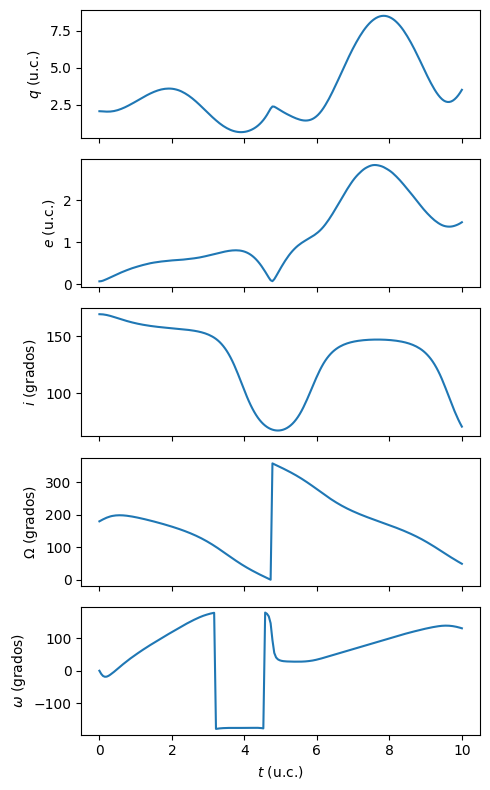

In [19]:
from numpy import pi
import matplotlib.pyplot as plt
fig,axs=plt.subplots(5,1,figsize=(5,8),sharex=True)

#Periapsis
axs[0].plot(ts,Es[:,0])
axs[0].set_ylabel("$q$ (u.c.)")
#Excentricidad
axs[1].plot(ts,Es[:,1])
axs[1].set_ylabel("$e$ (u.c.)")
#Inclinación
axs[2].plot(ts,Es[:,2]*180/pi)
axs[2].set_ylabel("$i$ (grados)")
#Longitud del nodo ascendente
axs[3].plot(ts,Es[:,3]*180/pi)
axs[3].set_ylabel("$\Omega$ (grados)")
#Argumento del periapsis
cond=Es[:,4]>pi
Es[cond,4]=Es[cond,4]-2*pi
axs[4].plot(ts,Es[:,4]*180/pi)
axs[4].set_ylabel("$\omega$ (grados)")

#Decoración
axs[-1].set_xlabel("$t$ (u.c.)")
fig.tight_layout()

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)